In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib as mlp
import matplotlib.pyplot as plt

In [74]:
data = pd.DataFrame(pd.read_csv("/workspaces/Visualiza--o-Dados-Premier-League/0_Bases_Tratadas/dados_tratados.csv", sep = ";"))
df = data


In [75]:
#criar variaveis alvo como binary == empate, vitoria, derrota
df["Vitoria_Casa"] = df.apply(lambda x: 1 if x["Time_Casa"] == x["Vencedor_casa/visita"] else 0, axis=1)
df["Vitoria_Visita"] = df.apply(lambda x: 1 if x["Time_Casa"] != x["Vencedor_casa/visita"] else 0, axis=1)
df["Empate"] = df.apply(lambda x: 1 if x["Vencedor_casa/visita"] == "Empate" else 0, axis=1)

display(df[["Vitoria_Casa", "Vitoria_Visita", "Empate"]])

,Vitoria_Casa,Vitoria_Visita,Empate
0,0,1,0
1,1,0,0
2,0,1,1
3,1,0,0
4,0,1,0
...,...,...,...
375,1,0,0
376,1,0,0
377,0,1,0
378,1,0,0


In [76]:
#Adicionar a rodada equivalente a partida
df["Rodada"] = np.floor(np.arange(len(df)) / 10) + 1
df["Rodada"] = df["Rodada"].astype(int)
display(df)

,Time_Casa,Placar,Time_Visita,Gols_Casa,Gols_Visita,Chute_casa,Chutes_visita,chute_errados_casa,chutes_errados_visita,defesas_casa,...,faltas_sofridas_visita,faltas_cometidas_casa,faltas_cometidas_visita,impedimentos_casa,impedimentos_visita,Vencedor_casa/visita,Vitoria_Casa,Vitoria_Visita,Empate,Rodada
0,FC Burnley,0:3,Man City,0,3,6,17,3,4,5,...,11,11,8,0,1,Man City,0,1,0,1
1,Arsenal,2:1,Nottm Forest,2,1,15,6,3,3,1,...,12,12,12,2,1,Arsenal,1,0,0,1
2,Bournemouth,1:1,West Ham,1,1,14,16,6,9,1,...,9,9,14,0,2,Empate,0,1,1,1
3,Brighton,4:1,Luton,4,1,27,9,10,4,2,...,9,11,12,2,3,Brighton,1,0,0,1
4,Everton,0:1,Fulham,0,1,19,9,6,6,1,...,12,12,6,6,3,Fulham,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Crystal Palace,5:0,Aston Villa,5,0,15,8,3,6,2,...,10,10,8,3,1,Crystal Palace,1,0,0,38
376,Liverpool,2:0,Wolves,2,0,36,4,12,0,2,...,14,14,10,3,2,Liverpool,1,0,0,38
377,Luton,2:4,Fulham,2,4,15,15,4,6,3,...,14,15,20,8,1,Fulham,0,1,0,38
378,Man City,3:1,West Ham,3,1,28,3,9,1,1,...,3,3,12,3,0,Man City,1,0,0,38


In [77]:
#setar o time vencedor como index e prepara um df para matriz de correlaçao
df_matriz = df.set_index("Vencedor_casa/visita")
df_matriz.drop(labels=["Time_Casa", "Time_Visita","Placar"] , axis=1, inplace=True)

In [78]:
df_matriz.corr()

,Gols_Casa,Gols_Visita,Chute_casa,Chutes_visita,chute_errados_casa,chutes_errados_visita,defesas_casa,defesas_visita,escanteios_casa,escanteios_visita,faltas_sofridas_casa,faltas_sofridas_visita,faltas_cometidas_casa,faltas_cometidas_visita,impedimentos_casa,impedimentos_visita,Vitoria_Casa,Vitoria_Visita,Empate,Rodada
Gols_Casa,1.000000,-0.215618,0.315217,-0.244120,0.013929,-0.126432,-0.197082,0.176860,0.066666,-0.151459,0.160701,-0.021119,-0.022102,0.156757,-0.040972,-0.003366,0.665849,-0.665849,-0.166985,0.059299
Gols_Visita,-0.215618,1.000000,-0.172532,0.349196,-0.138351,0.042217,0.202158,-0.098886,-0.085190,0.112368,-0.124234,0.064572,0.070362,-0.110482,0.061538,0.004692,-0.553627,0.553627,-0.046488,0.053783
Chute_casa,0.315217,-0.172532,1.000000,-0.444026,0.744047,-0.302156,-0.317065,0.674913,0.500122,-0.380269,0.052020,-0.074408,-0.073781,0.062620,-0.048251,0.006148,0.250560,-0.250560,-0.037239,0.079290
Chutes_visita,-0.244120,0.349196,-0.444026,1.000000,-0.301016,0.743429,0.670745,-0.238506,-0.337369,0.597262,-0.146215,-0.003386,0.001301,-0.144350,0.034773,-0.025210,-0.343652,0.343652,0.068963,0.013164
chute_errados_casa,0.013929,-0.138351,0.744047,-0.301016,1.000000,-0.212455,-0.232522,0.291000,0.320329,-0.245991,-0.070332,-0.149744,-0.147721,-0.049173,-0.049458,0.032235,0.061691,-0.061691,0.000161,0.039877
chutes_errados_visita,-0.126432,0.042217,-0.302156,0.743429,-0.212455,1.000000,0.285861,-0.111995,-0.258967,0.393072,-0.108047,0.002323,0.008992,-0.095932,-0.010825,-0.001028,-0.167260,0.167260,0.080557,-0.028733
defesas_casa,-0.197082,0.202158,-0.317065,0.670745,-0.232522,0.285861,1.000000,-0.172754,-0.195428,0.373859,-0.082075,-0.060968,-0.057504,-0.095471,0.039437,-0.084131,-0.220974,0.220974,0.050657,0.041287
defesas_visita,0.176860,-0.098886,0.674913,-0.238506,0.291000,-0.111995,-0.172754,1.000000,0.330625,-0.246357,0.023022,-0.026190,-0.022240,0.032370,0.037685,0.006933,0.130489,-0.130489,0.021315,0.096832
escanteios_casa,0.066666,-0.085190,0.500122,-0.337369,0.320329,-0.258967,-0.195428,0.330625,1.000000,-0.351531,0.097461,-0.043056,-0.036149,0.089110,-0.067796,-0.051386,0.058801,-0.058801,0.024878,0.014350
escanteios_visita,-0.151459,0.112368,-0.380269,0.597262,-0.245991,0.393072,0.373859,-0.246357,-0.351531,1.000000,-0.163077,-0.053261,-0.049999,-0.165980,0.100478,-0.013946,-0.172009,0.172009,-0.000840,0.013716


In [79]:
# 1. Calcular a matriz de correlação (usando 'matriz_correlacao' do exemplo acima)

# 2. Criar o heatmap interativo com Plotly Express
fig = px.imshow(
    df_matriz,
    text_auto=".2f",            # Adiciona os valores de correlação nas células (formato .2f)
    aspect="auto",              # Ajuste automático do aspecto para DataFrames
    color_continuous_scale='RdBu_r', # Colormap divergente
    zmin=-1, zmax=1,            # Garante que o intervalo de cor seja de -1 a 1
    title="Matriz de Correlação Interativa com Plotly"
)

# 3. Ajustes de layout para melhor visualização (opcional)
fig.update_xaxes(side="bottom")
fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=800
)

# 4. Mostrar a figura
fig.show()

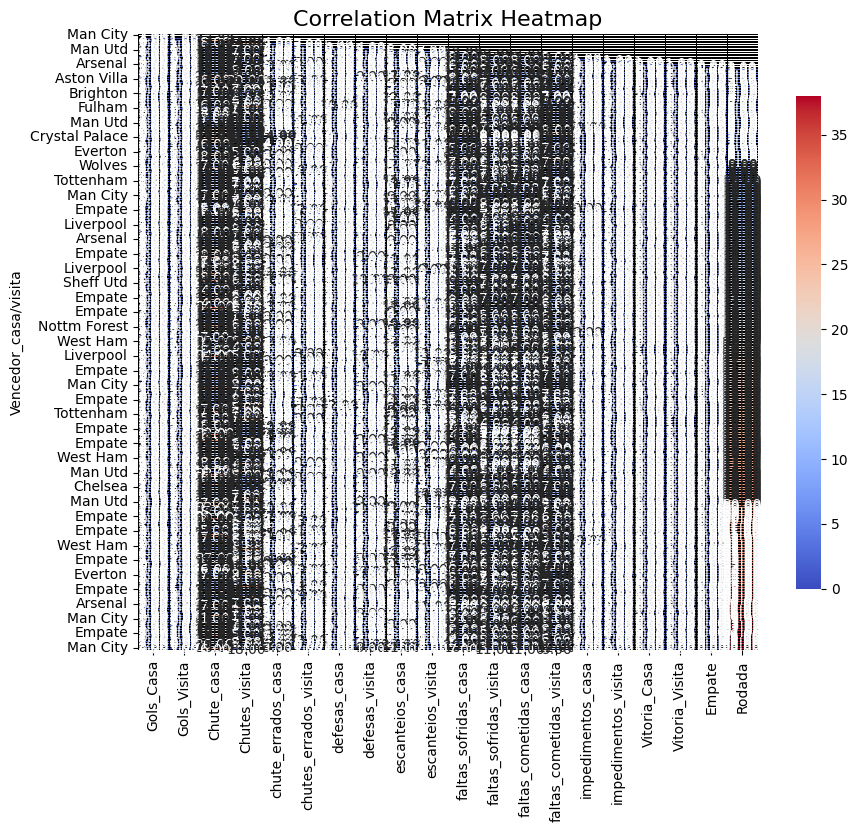

In [81]:
mask = np.triu(np.ones_like(df_matriz, dtype=bool))

# 4. Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# 5. Draw the heatmap
sns.heatmap(df_matriz,
            mask=mask,
            annot=True, # Show values on the heatmap
            cmap='coolwarm', # Color map (e.g., 'viridis', 'YlGnBu')
            fmt=".2f", # Format values to 2 decimal places
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'shrink': .8}) # Adjust color bar size

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()